In [4]:
import matplotlib.pyplot as plt
import numpy as np
from math import gamma
from scipy.integrate import quad

In [5]:
def model(x, a): return np.exp(-a*x)

In [6]:
d = 2
alpha_d = np.pi**(d/2) * gamma(d/2 + 1)

In [7]:
alpha_d

3.141592653589793

In [8]:
def dV_dx(x):
    return alpha_d * x**(d-1)
def binng_model(x_low, x_up, a):
    def model_dV_dx(x): return dV_dx(x)*model(x, a)
    V = quad(dV_dx, x_low, x_up)[0]
    s = quad(model_dV_dx, x_low, x_up)[0]
    return s/V

In [9]:
a = 10
x_corner = np.logspace(-1, 1, 20)
mean_x_corner = np.array([np.mean([x_corner[i], x_corner[i+1]]) for i in range(len(x_corner)-1)])
x_array = np.linspace(0.1, 10, 1000)
y_model = model(x_array, a)
y_model_center = model(mean_x_corner, a)
y_binned = np.zeros(len(x_corner)-1)
for i in range(len(x_corner)-1):
    y_binned[i] = binng_model(x_corner[i], x_corner[i+1], a)

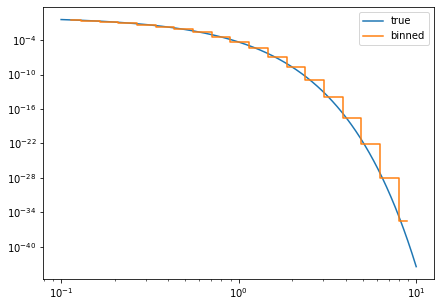

In [10]:
plt.figure(figsize = (7,5))
plt.loglog(x_array, y_model, label = 'true')
plt.step(mean_x_corner, y_binned, label = 'binned', where = 'mid')
plt.legend()

function of n:

In [75]:
a = 1
sigma_signal = .3
x_low, x_up = 1, 10
ns = 10
def error_list(n):
    x_corner = np.logspace(np.log10(x_low), np.log10(x_up), n + 1)
    mean_x_corner = np.array([np.mean([x_corner[i], x_corner[i+1]]) for i in range(len(x_corner)-1)])
    y_binned = np.zeros(len(x_corner)-1)
    #binned vector
    for i in range(len(x_corner)-1):
        y_binned[i] = binng_model(x_corner[i], x_corner[i+1], a)
    y_true_center = model(mean_x_corner, a)
    #error:
    S = np.zeros(len(x_corner)-1)
    for i in range(len(x_corner)-1):
        S[i] = quad(dV_dx, x_corner[i], x_corner[i+1])[0]
    err = sigma_signal/np.sqrt(ns * S)
    return mean_x_corner, err, y_binned, y_true_center

In [76]:
mean_x1, err1, y_binned1, y_true_center1 = error_list(10)
mean_x2, err2, y_binned2, y_true_center2 = error_list(20)
mean_x3, err3, y_binned3, y_true_center3 = error_list(30)

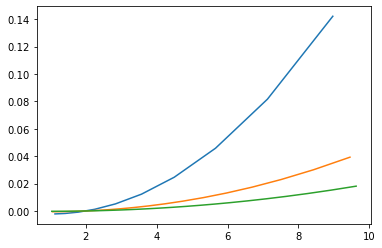

In [78]:
plt.plot(mean_x1, y_binned1/y_true_center1 -1)
plt.plot(mean_x2, y_binned2/y_true_center2 -1)
plt.plot(mean_x3, y_binned3/y_true_center3 -1)